<font color='blue'>Привет! Поздравляю со вторым выполненным проектом. Он значительно объемнее первого. Меня зову Алексей, я проверю твою работу и напишу свои комментарии. Они, в зависимости от результата проверки, будут в </font><font color='green'>зеленом (когда все отлично),</font> <font color='brown'>коричневом (когда желательно доработать)</font><font color='blue'> или</font> <font color='red'>красном (когда нужно переделать, чтобы я принял работу).</font><font color='blue'> Ну и в синем будут просто советы и нейтральные комментарии. Постарайся учесть все это в дальнейших проектах.</font>

<div style="border:solid red; padding: 10px">
<font color='green'>
Спасибо что оценил мою работу, позволь дать тебе совет, когда будешь проверь работы других челиков. Постарайся использовать рамки  или гифки (не знаю почему моя гифка не прогрузилась) или что-нибудь, чем можно привлечь внимание. Это реально помогает когда ты скролишь весь notebook. Я видел, ты неплохо используешь элементы HTML, или не добавляя рамкки ты так гарантируешь что я промотрю всю тетрадь в поисках твоих комментариев?
</div> 
<iframe src="https://gifer.com/embed/6os" width=20 height=40 frameBorder="0" allowFullScreen></iframe>

<b>UPD: <font color='blue'>Я исхожу из того, что если студент написал довольно объемную работу, для него не оставит труда её внимательно проскроллить :) Уж красные комментарии точно не пропустит.

# Исследование объявлений о продаже квартир

Есть архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
#Первичный взгляд на имеющиеся данные
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
data[data['studio']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,NaN,25.0,18.20,5,NaN,...,NaN,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,NaN,...,NaN,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [7]:
#Выводим статистику по исходным данным
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [8]:
#Преобразуем столбец studio к int для оценки корреляции
data['studio_int']=data['studio'].astype('int')

In [9]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

### Вывод

- В качестве разделителя в csv файле используется знак табуляции (\t), вместо типичной запятой
- Исходный данные  представляют собой таблицу, содержащую 23699 записей и 22 признака
- Первичный анализ показывает, что таблица содержит множество пустых значенений, которые в последующих частях проекта будут рассмотреы более подробно

<font color='green'>Данные загружены и первично изучены, отлично.</font>

### Шаг 2. Предобработка данных

In [10]:
#Изучим пропущенные значения
#Число фотографий квартиры в объявлении
data['total_images'].value_counts()

#Цена на момент снятия с публикации
data['last_price'].value_counts()

#Площадь квартиры в квадратных метрах (м²)
data['total_area'].value_counts()

#дата публикации
data['first_day_exposition'].value_counts()

#число комнат
data['rooms'].value_counts()

#высота потолков (м)
data['ceiling_height'].value_counts()

#всего этажей в доме
data['floors_total'].value_counts()

#жилая площадь в квадратных метрах(м²)
data['living_area'].value_counts()

#Этаж
data['floor'].value_counts()

#апартаменты?
data['is_apartment'].value_counts()

#Квартира-студия?
data['studio'].value_counts()

#Свободная планировка?
data['open_plan'].value_counts()

#Площадь кухни в квадратных метрах
data['kitchen_area'].value_counts()

#Число балконов
data['balcony'].value_counts()

#Название населённого пункта
data['locality_name'].value_counts()

#Расстояние до ближайшего аэропорта в метрах (м)
data['airports_nearest'].value_counts()

#расстояние до центра города (м)
data['cityCenters_nearest'].value_counts()

#Число парков в радиусе 3 км
data['parks_around3000'].value_counts()

#Расстояние до ближайшего парка
data['parks_nearest'].value_counts()

#Число водоёмов в радиусе 3 км
data['ponds_around3000'].value_counts()

#Расстояние до ближайшего водоёма (м)
data['ponds_nearest'].value_counts()

#Сколько дней было размещено объявление (от публикации до снятия)
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [11]:
#Формируем первоначальный вывод
for column in data.columns:
    #Количество пустых записей
    emptyRecords=len(data.loc[data[column].isnull()])
    if emptyRecords>0:
        print('- {} - содержит {} пропусков ({:.1%} от всех)'.format(column, emptyRecords, emptyRecords/data.shape[0]))

- ceiling_height - содержит 9195 пропусков (38.8% от всех)
- floors_total - содержит 86 пропусков (0.4% от всех)
- living_area - содержит 1903 пропусков (8.0% от всех)
- is_apartment - содержит 20924 пропусков (88.3% от всех)
- kitchen_area - содержит 2278 пропусков (9.6% от всех)
- balcony - содержит 11519 пропусков (48.6% от всех)
- locality_name - содержит 49 пропусков (0.2% от всех)
- airports_nearest - содержит 5542 пропусков (23.4% от всех)
- cityCenters_nearest - содержит 5519 пропусков (23.3% от всех)
- parks_around3000 - содержит 5518 пропусков (23.3% от всех)
- parks_nearest - содержит 15620 пропусков (65.9% от всех)
- ponds_around3000 - содержит 5518 пропусков (23.3% от всех)
- ponds_nearest - содержит 14589 пропусков (61.6% от всех)
- days_exposition - содержит 3181 пропусков (13.4% от всех)


In [12]:
#Быстрый взгляд на строки с пустыми значениями
#data.loc[data["floors_total"].isnull()]
#data.loc[data["living_area"].isnull()]
#data.loc[data["kitchen_area"].isnull()]
#data.loc[(data["cityCenters_nearest"].isnull()) & (data["locality_name"]=='Санкт-Петербург')]
#data.loc[(data["airports_nearest"].isnull())& (data["locality_name"]=='Санкт-Петербург')]

In [13]:
#Находим среднимй размер кухонь для студий
data[~(data['kitchen_area'].isnull())&(data['studio'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,studio_int


In [14]:
#Дропаем пустые строки с locality_name
data.dropna(subset=['locality_name'],inplace=True)

In [15]:
#Сгруппируем места с малым количеством объялений в единые группы
def set_locality_name(row):
    name=row['locality_name']
    if 'городской поселок' in name:
        return 'городской поселок'
    if 'городской посёлок' in name:
        return 'городской поселок'
    if 'деревня' in name:
        return 'деревня'
    if 'коттеджный поселок' in name:
        return 'коттеджный поселок'
    if 'поселок' in name:
        return 'поселок'
    if 'посёлок' in name:
        return 'поселок'
    if 'поселок городского типа' in name:
        return 'поселок городского типа'
    if 'поселок станции' in name:
        return 'поселок станции'
    if 'посёлок при железнодорожной станции' in name:
        return 'поселок станции'
    if 'садоводческое некоммерческое товарищество' in name:
        return 'садоводческое товарищество'
    if 'садовое товарищество' in name:
        return 'садоводческое товарищество'
    if 'село' in name:
        return 'село'
    return name

data['locality_name_type']=data.apply(set_locality_name, axis=1)

<font color='green'>Хороший ход.

In [16]:
data['studio'].value_counts()

False    23501
True       149
Name: studio, dtype: int64

In [17]:
#Для единообразия количество комнат для студий примем равным 0
data['rooms']=data['rooms'].where(~data['studio'], 0)

In [18]:
#Преобразуем формат даты
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

Корреляция между высотой потолков и расстоянием от центра составляет: -0.3670063339856206
Медианная высота потолков для квартир из центра: 3.1
Медианная высота потолков для квартир вне центра: 2.64


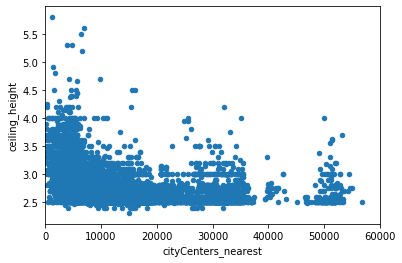

In [19]:
#Посмотрим, как зависит расстояние от центра на высоту потолков

#У некоторых объектов высота потолков >6 метров - это что, зимний дворец? Коробки высотой меньше 2 метров также надо отбросить
data_for_ceiling_parse=data.loc[(data['ceiling_height']<6) & (data['ceiling_height']>2)]

#Выберем непустые значения
ceiling_height_parse=data_for_ceiling_parse.loc[~data_for_ceiling_parse["ceiling_height"].isnull()]
ceiling_height_parse.plot(x='cityCenters_nearest', y='ceiling_height', kind='scatter',xlim=(0,60000))
#Условимся, что всё что ближе 5 км от центра - это центральный район, там стоят старые здания с высокими потолками
print("Корреляция между высотой потолков и расстоянием от центра составляет:",ceiling_height_parse['cityCenters_nearest'].corr(ceiling_height_parse['ceiling_height']))
median_central_ceiling_height=ceiling_height_parse[ceiling_height_parse['cityCenters_nearest']<5000]['ceiling_height'].median()
print('Медианная высота потолков для квартир из центра:',median_central_ceiling_height)
median_noncentral_ceiling_height=ceiling_height_parse[ceiling_height_parse['cityCenters_nearest']>5000]['ceiling_height'].median()
print('Медианная высота потолков для квартир вне центра:',median_noncentral_ceiling_height)

Как видно из диаграммы рассеяния, между расстоянием от центра и высотой потолок наблюдается связь, но не такая сильная как ожидалось, всего лишь -0.37. По графику видно, что квартиры в радиусе 5 км от центра имеют медианную высоту потолков, равную: 3,1. Данное значение вписывается в высоту для сталинки, следовательно, для заполненения пропусков будем использовать 2 типа значений по высоте потолков: 3,1 - для квартир в районе 5 км от центра и 2.64 для остальных

<font color='green'>Хорошее обоснование с использованием корреляции.

In [20]:
def set_ceiling_height(row):
    if pd.isnull(row['ceiling_height']):
        if row['cityCenters_nearest']<5000:
            return median_central_ceiling_height
        else:
            return median_noncentral_ceiling_height
    return row['ceiling_height']

In [21]:
#заполнили пропуски
data['ceiling_height']=data.apply(set_ceiling_height, axis=1)
#Дропнули аномальные значения
data=data.loc[(data['ceiling_height']<6) & (data['ceiling_height']>2)]

In [22]:
#Найдём самый дальний от центра дом с пометкой Санкт-Петербург - это 30 км от центра (забыл зачем)
city_border=data.loc[data['locality_name_type']=='Санкт-Петербург']['cityCenters_nearest'].max()

In [23]:
city_border

29493.0

In [24]:
#Дропаем строки с пустым количеством этажей
data.dropna(subset=['floors_total'],inplace=True)

<font color=blue>Их немного, можно пожертвовать.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23521 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23521 non-null int64
last_price              23521 non-null float64
total_area              23521 non-null float64
first_day_exposition    23521 non-null datetime64[ns]
rooms                   23521 non-null int64
ceiling_height          23521 non-null float64
floors_total            23521 non-null float64
living_area             21658 non-null float64
floor                   23521 non-null int64
is_apartment            2746 non-null object
studio                  23521 non-null bool
open_plan               23521 non-null bool
kitchen_area            21307 non-null float64
balcony                 12066 non-null float64
locality_name           23521 non-null object
airports_nearest        18016 non-null float64
cityCenters_nearest     18039 non-null float64
parks_around3000        18040 non-null float64
parks_nearest           8017 non-null float64
ponds_a

In [26]:
#Заполняем пустые значения в столбце жилая площадь в квадратных метрах(м²) 
#Сперва группируем наши данные по количеству комнат
living_area_parse=data.loc[~data['living_area'].isnull()]
rooms_grouped=living_area_parse.pivot_table(index='rooms', values='living_area', aggfunc='median')

In [27]:
rooms_grouped

,living_area
rooms,
0,18.000
1,17.600
2,30.500
3,45.000
4,63.550
5,91.785
6,124.400
7,145.000
8,161.000


In [28]:
%%time
for rooms in rooms_grouped.index:
    median = rooms_grouped.loc[rooms]['living_area']
    data.loc[data['rooms'] == rooms, 'living_area'] = data[data['rooms'] == rooms]['living_area'].fillna(median)

CPU times: user 72 ms, sys: 4 ms, total: 76 ms
Wall time: 86.2 ms


<div style="border:solid red; padding: 10px">
<font color='green'>
Забавно что ты это не удалил. А где выполняются расчёты. На моём компе или на вашем сервере?
</div> 

<b>UPD: <font color='blue'>Эхх, вся конспирация на смарку ;) Видимо, слишком увлекся объяснениями. Рассчеты выполняются на сервере.

In [29]:
#Напиши мне как можно сделать проще, если можно
def set_living_area(row):
    if pd.isnull(row['living_area']):
        for index in rooms_grouped.index:
            if row['rooms']==index:
                return rooms_grouped.loc[index,'living_area']
        return 'Ошибка'
    return row['living_area']

In [30]:
%%time
data['living_area']=data.apply(set_living_area,axis=1)

CPU times: user 812 ms, sys: 0 ns, total: 812 ms
Wall time: 809 ms


<font color=green>Очень хорошо. Между этими величинами прослеживается большая корреляция.

<font color=blue>Будет лучше проходить не по всей таблице (что долго), а по количеству комнат (rooms_grouped.index). Далее для каждого количества выделять через .loc все элементы, где количество комнат соответствует текущему и приравнять их к результату метода fillna с соответствующей медианой. Сперва попробуй сам, код спрятан ниже.      
<code><font color=	EEEEEE>
        for rooms in rooms_grouped.index:
            median = rooms_grouped.loc[rooms]['living_area']
            data.loc[data['rooms'] == rooms, 'living_area'] = data[data['rooms'] == rooms]['living_area'].fillna(median)
    
<font color=blue>Можешь сравнить время выполнения, поставив в начало ячейки %%time
    

In [31]:
#Дропаем пустые строки в столбце cityCenters_nearest для Санкт-Петербурга
data=data.loc[~((data["cityCenters_nearest"].isnull()) & (data["locality_name_type"]=='Санкт-Петербург'))]
data["cityCenters_nearest"].fillna(0)

#Сперва группируем наши данные по locality_name
cityCenters_nearest_parse=data.loc[~data['cityCenters_nearest'].isnull()]
locality_grouped=cityCenters_nearest_parse.pivot_table(index='locality_name_type', 
                                                       values='cityCenters_nearest', aggfunc='median')

In [32]:
#Напиши мне как можно сделать проще, если можно
def set_cityCenters_nearest(row):
    if pd.isnull(row['cityCenters_nearest']):
        for index in locality_grouped.index:
            if row['locality_name']==index:
                return locality_grouped.loc[index,'cityCenters_nearest']
        return 'Ошибка'
    return row['cityCenters_nearest']

In [33]:
locality_grouped

,cityCenters_nearest
locality_name_type,
Зеленогорск,53381.0
Колпино,32018.0
Красное Село,29155.0
Кронштадт,49572.5
Ломоносов,51677.0
Павловск,32683.0
Петергоф,33771.0
Пушкин,27930.5
Санкт-Петербург,12243.0


In [34]:
data['cityCenters_nearest']=data.apply(set_cityCenters_nearest, axis=1)

In [35]:
#Заполняем пропуски в столбце is_apartment
data['is_apartment'].fillna(False, inplace=True)

In [36]:
#Заполняем пропуски в столбце balcony
data['balcony'].fillna(0, inplace=True)

In [37]:
data.corr().sort_values(by='kitchen_area')['kitchen_area']

ponds_nearest      -0.104907
airports_nearest    0.007852
parks_nearest       0.029551
balcony             0.045592
is_apartment        0.053021
parks_around3000    0.088684
days_exposition     0.100505
total_images        0.105547
floor               0.137219
ponds_around3000    0.151290
floors_total        0.166278
rooms               0.270671
ceiling_height      0.362394
living_area         0.425549
last_price          0.521009
total_area          0.610398
kitchen_area        1.000000
studio                   NaN
open_plan                NaN
studio_int               NaN
Name: kitchen_area, dtype: float64

In [38]:
#Заполняем пропуски в столбце kitchen_area
#Сперва группируем наши данные по количеству комнат
#Может не надо было порождать лишнюю сущность, а записхнуть в values несколько столбцов
kitchen_area_parse=data.loc[~data['kitchen_area'].isnull()]
area_grouped_for_kitchen=kitchen_area_parse.pivot_table(index='total_area', values='kitchen_area', aggfunc='median')

In [39]:
for area in area_grouped_for_kitchen.index:
    median = area_grouped_for_kitchen.loc[area]['kitchen_area']
    data.loc[data['total_area'] == area, 'kitchen_area'] = data[data['total_area'] == area]['kitchen_area'].fillna(median)

In [40]:
data.dropna(subset=['kitchen_area'],inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23276 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23276 non-null int64
last_price              23276 non-null float64
total_area              23276 non-null float64
first_day_exposition    23276 non-null datetime64[ns]
rooms                   23276 non-null int64
ceiling_height          23276 non-null float64
floors_total            23276 non-null float64
living_area             23276 non-null float64
floor                   23276 non-null int64
is_apartment            23276 non-null bool
studio                  23276 non-null bool
open_plan               23276 non-null bool
kitchen_area            23276 non-null float64
balcony                 23276 non-null float64
locality_name           23276 non-null object
airports_nearest        17903 non-null float64
cityCenters_nearest     23276 non-null object
parks_around3000        17927 non-null float64
parks_nearest           7966 non-null float64
ponds_aro

In [42]:
#Напиши мне как можно сделать проще, если можно
def set_kithen_area(row):
    if pd.isnull(row['kitchen_area']):
        for index in rooms_grouped_for_kitchen.index:
            if row['rooms']==index:
                return rooms_grouped_for_kitchen.loc[index,'kitchen_area']
        if row['rooms']==0:
            try:
                return (row['total_area']-row['living_area'])*0.66
            except:
                return 'Ошибка'
    return row['kitchen_area']

In [43]:
#data['kitchen_area']=data.apply(set_kithen_area,axis=1)

<font color=blue>Между площадью кухни и количеством комнат корреляция довольно слабая.

<font color='brown'>Я бы применил вариант со студиями для всех объявлений. Со своим коэффициентом, конечно же.

<div style="border:solid red; padding: 10px">
<font color='green'>
Не совсем понял что ты имел ввиду "применил вариант со студиями". У нас. Чтобы я посмотрел корреляцию между является ли квартира студией и размер кухни?. Так как я не понял этого то я увидел, что среди зависимостей есть средненькая корреляция с total_area, воспользуюсь ей, а остатки (комнаты необычных размеров выбросим (около 200 значений)
</div> 

<b>UPD: <font color='blue'>Согласен, немного расплывчато написал. Я имел в виду заполнить пропуски в площади кухни следующим образом: посчитать среднее отношение площади кухни к общей площади, после чего мы сможем восстановить площадь кухни, умножив общую площадь на этот коэффициент.  
    Ты заполняешь пропуски в соответствии с количеством комнат, а площадь кухни не очень от этого зависит.

In [44]:
#Добавляем отметки о том закрыто объявление или нет
data['Open']=data['days_exposition'].isnull()

In [45]:
def set_days_exposition(row):
    if pd.isnull(row['days_exposition']):
        return (now-row['first_day_exposition']).days
    return row['days_exposition']

In [46]:
import datetime
now=datetime.datetime.today()
#Заполняем пропуски в столбце days_exposition
data['days_exposition']=data.apply(set_days_exposition, axis=1)

In [47]:
#Заполняем пропуски в столбце parks_around3000
data['parks_around3000'].fillna(0, inplace=True)
#Заполняем пропуски в столбце ponds_around3000
data['ponds_around3000'].fillna(0, inplace=True)

In [48]:
#Заполняем пропуски в столбце parks_nearest
parks_nearest_parse=data.loc[~data['parks_nearest'].isnull()]
parks_nearest_grouped=parks_nearest_parse.pivot_table(index='locality_name_type', 
                                                      values='parks_nearest', aggfunc='median')

In [49]:
#Напиши мне как можно сделать проще, если можно
def set_parks_nearest(row):
    if pd.isnull(row['parks_nearest']):
        if row['parks_around3000']==0:
            return 0
        for index in parks_nearest_grouped.index:
            if row['locality_name_type']==index:
                return parks_nearest_grouped.loc[index,'parks_nearest']
        return 'Ошибка'
    return row['parks_nearest']

In [50]:
data['parks_nearest']=data.apply(set_parks_nearest,axis=1)

In [51]:
#Заполняем пропуски в столбце ponds_nearest
ponds_nearest_parse=data.loc[~data['ponds_nearest'].isnull()]
ponds_nearest_grouped=ponds_nearest_parse.pivot_table(index='locality_name_type', 
                                                      values='ponds_nearest', aggfunc='median')

In [52]:
#Напиши мне как можно сделать проще, если можно
def set_ponds_nearest(row):
    if pd.isnull(row['ponds_nearest']):
        if row['ponds_around3000']==0:
            return 0
        for index in ponds_nearest_grouped.index:
            if row['locality_name']==index:
                return ponds_nearest_grouped.loc[index,'ponds_nearest']
        return 'Ошибка'
    return row['ponds_nearest']

In [53]:
data['ponds_nearest']=data.apply(set_ponds_nearest,axis=1)

In [54]:
#Заполняем пропуски в столбце airports_nearest
data=data.loc[~((data["airports_nearest"].isnull())& (data["locality_name_type"]=='Санкт-Петербург'))]
airports_nearest_grouped=data.pivot_table(index='locality_name_type', 
                                          values='airports_nearest', aggfunc='median')

In [55]:
#Напиши мне как можно сделать проще, если можно
def set_airports_nearest(row):
    if pd.isnull(row['airports_nearest']):
        for index in airports_nearest_grouped.index:
            if row['locality_name']==index:
                return airports_nearest_grouped.loc[index,'airports_nearest']
        return 'Ошибка'
    return row['airports_nearest']

In [56]:
data['airports_nearest']=data.apply(set_airports_nearest,axis=1)

In [57]:
#Данные, не болейте
data[data['cityCenters_nearest']=='Ошибка']
data[data['airports_nearest']=='Ошибка']
data[data['kitchen_area']=='Ошибка']['rooms'].value_counts()

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Series([], Name: rooms, dtype: int64)

In [58]:
data['cityCenters_nearest']=data['cityCenters_nearest'].where(data['cityCenters_nearest']!='Ошибка',0)
data['airports_nearest']=data['airports_nearest'].where(data['airports_nearest']!='Ошибка',0)

In [59]:
#Приводим к нужным форматам
data["floors_total"]=data["floors_total"].astype('int')
data["parks_around3000"]=data["parks_around3000"].astype('int')
data["days_exposition"]=data["days_exposition"].astype('int')
data['airports_nearest']=data["days_exposition"].astype('int')
data['balcony']=data['balcony'].astype('int')
data['cityCenters_nearest']=data["cityCenters_nearest"].astype('int')
data["ponds_around3000"]=data["ponds_around3000"].astype('int')

In [60]:
#И начались костыли
#Средний размер кухонь для студий
#mean_kitchen_studio=data[(data['studio'])&(data["kitchen_area"]!='Ошибка')]["kitchen_area"].mean()
#data['kitchen_area']=data['kitchen_area'].where(data['kitchen_area']!="Ошибка",mean_kitchen_studio)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23252 entries, 0 to 23698
Data columns (total 25 columns):
total_images            23252 non-null int64
last_price              23252 non-null float64
total_area              23252 non-null float64
first_day_exposition    23252 non-null datetime64[ns]
rooms                   23252 non-null int64
ceiling_height          23252 non-null float64
floors_total            23252 non-null int64
living_area             23252 non-null float64
floor                   23252 non-null int64
is_apartment            23252 non-null bool
studio                  23252 non-null bool
open_plan               23252 non-null bool
kitchen_area            23252 non-null float64
balcony                 23252 non-null int64
locality_name           23252 non-null object
airports_nearest        23252 non-null int64
cityCenters_nearest     23252 non-null int64
parks_around3000        23252 non-null int64
parks_nearest           23252 non-null float64
ponds_around3000 

In [62]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,studio_int,locality_name_type,Open
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,408,16028,1,482.0,2,755.0,408,0,Санкт-Петербург,True
1,7,3350000.0,40.40,2018-12-04,1,2.64,11,18.60,1,False,...,81,18603,0,0.0,0,0.0,81,0,поселок,False
2,10,5196000.0,56.00,2015-08-20,2,2.64,5,34.30,4,False,...,558,13933,1,90.0,2,574.0,558,0,Санкт-Петербург,False
3,0,64900000.0,159.00,2015-07-24,3,2.64,14,45.00,9,False,...,424,6800,2,84.0,3,234.0,424,0,Санкт-Петербург,False
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,121,8098,2,112.0,1,48.0,121,0,Санкт-Петербург,False
5,10,2890000.0,30.40,2018-09-10,1,2.64,12,14.40,5,False,...,55,0,0,0.0,0,0.0,55,0,городской поселок,False
6,6,3700000.0,37.30,2017-11-02,1,2.64,26,10.60,6,False,...,155,19143,0,0.0,0,0.0,155,0,поселок,False
7,5,7915000.0,71.60,2019-04-18,2,2.64,24,30.50,22,False,...,366,11634,0,0.0,0,0.0,366,0,Санкт-Петербург,True
8,20,2900000.0,33.16,2018-05-23,1,2.64,27,15.43,26,False,...,189,0,0,0.0,0,0.0,189,0,поселок,False
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,289,15008,0,0.0,0,0.0,289,0,Санкт-Петербург,False


### Вывод

Первичный анализ показывает что следующие столбцы содержат пустые значения:
- ceiling_height - содержит 9195 пропусков (38.8% от всех) - не думаю что Вы сами с ходу скажите какая высота у потолков у Вас в квартире, а заглядывать в выписку из ЕГРН слишком сложно. Так как пропущенных значений слишком много их следует заполнить - заполнять средним значением по всем квартирам будет неправильно, так как высота старых квартир (тех-что ближе к центру), сталинки (высота дома до 5 этажей) и в современных муровейниках разная. В ходе анализа обнаружилось что высота некоторых объектов выше 6 метров, а некоторых меньше 2. Их явно нужно отбросить
- floors_total - содержит 86 пропусков (0.4% от всех) - можно было бы предположить что это отдельные дома, однако некоторые записи, в которых данный признак является пустым, содержат в себе номерни этажа, поэтому заменить пустные значения на 1 будет ошибкой. Ввиду того, что количество записей с данным пустующим признаком достаточно мало, их можно смело отбросить
- living_area - содержит 1903 пропусков (8.0% от всех) - заполняем медиаными значениями площадей, которые сгруппированы по количеству комнат
- is_apartment - содержит 20924 пропусков (88.3% от всех) - аппаратаменты - это всё таки специфичная вещь и я просто заменяю пустые значения на False
- kitchen_area - содержит 2278 пропусков (9.6% от всех) - заполняем медианными значениями, сгруппированными по количеству комнат. Для студий размер кухонь по имеющимся данным найти невозможно, так как нет строк, в которых бы признак "studio" был равен True, а признак kitchen_area не равнялся NaN. Поэтому будем исходить из соображений, что кухня составляе 0,66 от нежилого помещения объекта, указанного в объявлении
- balcony - содержит 11519 пропусков (48.6% от всех) - в соответствии с рекомндациями заменяем на 0
- locality_name - содержит 49 пропусков (0.2% от всех) - просто дропнем от неправильных данных подальше
- airports_nearest - содержит 5542 пропусков (23.4% от всех) - для Санкт-Петербурга данный пункт пустует у 24 записей, следовательно, их можно дропнуть, остальные заполняются медианными
- cityCenters_nearest - содержит 5519 пропусков (23.3% от всех) - для городов и посёлков из области можно заполнить медианными, а питерские объявления дропнуть (их всего 60 записей)
- parks_around3000 - содержит 5518 пропусков (23.3% от всех) - заполняем нулями и предполагаем что нет парков поблизости
- parks_nearest - содержит 15620 пропусков (65.9% от всех) - 0, если parks_around3000==0, в противном случае заполням медианными
- ponds_around3000 - содержит 5518 пропусков (23.3% от всех) - заполняем нулямии предполагаем что нет прудов поблизости
- ponds_nearest - содержит 14589 пропусков (61.6% от всех) - 0, если ponds_around3000==0, в противном случае заполняем медианными по locality_name
- days_exposition - содержит 3181 пропусков (13.4% от всех) - предполагаем что объявление ещё висит и мы вычитаем из текущей даты дату размещения объявления, а также делаем отметку, что объявления ещё открыты

Для поселёков в в сгруппированных по locality_name нет ни одной записи, в которой содержится информация о airports_nearest и о cityCenters_nearest. Выкидывать эти данные нельзя, поэтому просто заполним их нулями

По поводу приведения данных к необходимому виду:
- first_day_exposition - использовали сдандартный метод to_datetime() в передачей необходимого формата 
- floors_total - преобразовали к целым числам без особого зазрения совести (просто отбросили нули)
- airports_nearest - работаем с метрами
- balcony - преобразовали к целочисленным значениям
- cityCenters_nearest - работаем с метрами
- parks_around3000 - преобразовали к целочисленным значениям
- ponds_around3000 - преобразовали к целочисленным значениям
- days_exposition - работаем с днями

<font color=green>Очень тщательное заполнение, молодец. Однако не стоит забывать, что перд нами не стоит вселенской задачи заполнить все пропуски. Что-то (например, количество прудов) можно и оставить, если не удается уверенно заполнить.

### Шаг 3. Посчитайте и добавьте в таблицу

In [63]:
#цена квадратного метра (price per square meter)
data['ppsm']=data['last_price']/data['total_area']

In [64]:
#Функция метки этажа квартиры
def floor_type(row):
    if row['floor']==1:
        return "Первый"
    if row['floor']==row['floors_total']:
        return "Последний"
    return "Другой"

In [65]:
#Функция метки дня недели
def weekday_type(row):
    if row['weekday']==0:
        return 'понедельник'
    if row['weekday']==1:
        return 'вторник'
    if row['weekday']==2:
        return 'среда'
    if row['weekday']==3:
        return 'четверг'
    if row['weekday']==4:
        return 'пятница'
    if row['weekday']==5:
        return 'суббота'
    if row['weekday']==6:
        return 'воскресенье'
    return "Ошибка"

In [66]:
#Функция метки для месяца
def month_type(row):
    if row['month']==1:
        return "Январь"
    if row['month']==2:
        return "Февраль"
    if row['month']==3:
        return "Март"
    if row['month']==4:
        return "Апрель"
    if row['month']==5:
        return "Май"
    if row['month']==6:
        return "Июнь"
    if row['month']==7:
        return "Июль"
    if row['month']==8:
        return "Август"
    if row['month']==9:
        return "Сентябрь"
    if row['month']==10:
        return "Октябрь"
    if row['month']==11:
        return "Ноябрь"
    if row['month']==12:
        return "Декабрь"
    return 'Ошибка'

In [67]:
#день недели публикации объявления;
data['weekday']=data['first_day_exposition'].dt.weekday
data['weekday_name']=data.apply(weekday_type, axis=1)
#месяц публикации объявления
data['month']=data['first_day_exposition'].dt.month
data['month_name']=data.apply(month_type, axis=1)
#Год публикации объявления
data['year']=data['first_day_exposition'].dt.year
#этаж квартиры; варианты — первый, последний, другой;
data['floor_type']=data.apply(floor_type, axis=1)

In [68]:
#соотношение жилой и общей площади
data['rate_live_to_com']=data['living_area']/data['total_area']
#отношение площади кухни к общей.
data['rate_kitchen_to_com']=data['kitchen_area']/data['total_area']

In [69]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,Open,ppsm,weekday,weekday_name,month,month_name,year,floor_type,rate_live_to_com,rate_kitchen_to_com
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,True,120370.370370,3,четверг,3,Март,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.64,11,18.60,1,False,...,False,82920.792079,1,вторник,12,Декабрь,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.64,5,34.30,4,False,...,False,92785.714286,3,четверг,8,Август,2015,Другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.64,14,45.00,9,False,...,False,408176.100629,4,пятница,7,Июль,2015,Другой,0.283019,0.094340
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,False,100000.000000,1,вторник,6,Июнь,2018,Другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.64,12,14.40,5,False,...,False,95065.789474,0,понедельник,9,Сентябрь,2018,Другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.64,26,10.60,6,False,...,False,99195.710456,3,четверг,11,Ноябрь,2017,Другой,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,2.64,24,30.50,22,False,...,True,110544.692737,3,четверг,4,Апрель,2019,Другой,0.425978,0.263966
8,20,2900000.0,33.16,2018-05-23,1,2.64,27,15.43,26,False,...,False,87454.764777,2,среда,5,Май,2018,Другой,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,False,88524.590164,6,воскресенье,2,Февраль,2017,Другой,0.714754,0.106557


<font color=green>Ну, здесь все просто, можно приступать к анализу.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [70]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,studio_int,ppsm,weekday,month,year,rate_live_to_com,rate_kitchen_to_com
count,23252.000000,2.325200e+04,23252.000000,23252.000000,23252.000000,23252.000000,23252.000000,23252.000000,23252.000000,23252.000000,...,23252.000000,23252.000000,23252.000000,23252.000000,2.325200e+04,23252.000000,23252.000000,23252.000000,23252.000000,23252.000000
mean,9.896525,6.484663e+06,60.205261,2.075047,2.705563,10.645063,34.305309,5.861904,10.435875,0.593454,...,0.590573,199.393730,233.340100,0.004645,9.904849e+04,2.566747,6.396869,2017.367925,0.563516,0.186732
std,5.678326,1.073975e+07,34.646067,1.071004,0.229084,6.575675,21.394007,4.859860,5.754219,0.959906,...,0.883382,305.532442,268.456394,0.067995,4.977819e+04,1.788785,3.491492,1.037249,0.109369,0.071162
min,0.000000,1.219000e+04,14.000000,0.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.500000,2.000000,7.000000,0.000000,...,0.000000,0.000000,45.000000,0.000000,7.639089e+04,1.000000,3.000000,2017.000000,0.490682,0.135080
50%,9.000000,4.650000e+06,52.000000,2.000000,2.640000,9.000000,30.400000,4.000000,9.000000,0.000000,...,0.000000,0.000000,124.000000,0.000000,9.485449e+04,3.000000,6.000000,2017.000000,0.566313,0.171429
75%,14.000000,6.751265e+06,69.700000,3.000000,2.700000,16.000000,42.700000,8.000000,11.800000,1.000000,...,1.000000,391.000000,364.000000,0.000000,1.140000e+05,4.000000,10.000000,2018.000000,0.637500,0.229756
max,50.000000,7.630000e+08,900.000000,19.000000,5.800000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,1344.000000,1969.000000,1.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.513095,0.787879


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23252 entries, 0 to 23698
Data columns (total 34 columns):
total_images            23252 non-null int64
last_price              23252 non-null float64
total_area              23252 non-null float64
first_day_exposition    23252 non-null datetime64[ns]
rooms                   23252 non-null int64
ceiling_height          23252 non-null float64
floors_total            23252 non-null int64
living_area             23252 non-null float64
floor                   23252 non-null int64
is_apartment            23252 non-null bool
studio                  23252 non-null bool
open_plan               23252 non-null bool
kitchen_area            23252 non-null float64
balcony                 23252 non-null int64
locality_name           23252 non-null object
airports_nearest        23252 non-null int64
cityCenters_nearest     23252 non-null int64
parks_around3000        23252 non-null int64
parks_nearest           23252 non-null float64
ponds_around3000 

Медиана столбца площадь квартиры в квадратных метрах (м²) равна: 52.00
Средние значение столбца площадь квартиры в квадратных метрах (м²) равна: 60.21


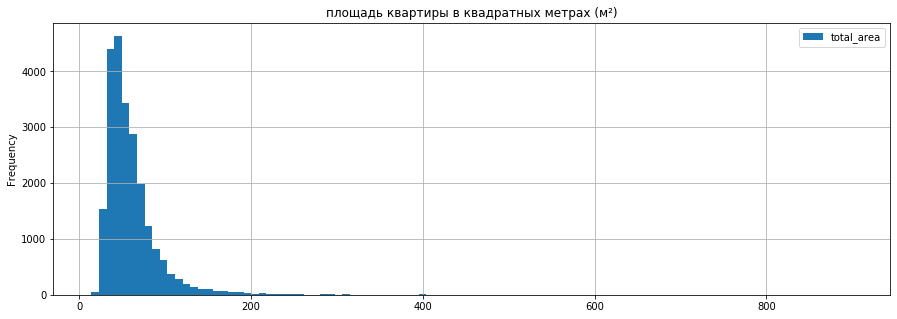

Медиана столбца жилая площадь в квадратных метрах(м²) равна: 30.40
Средние значение столбца жилая площадь в квадратных метрах(м²) равна: 34.31


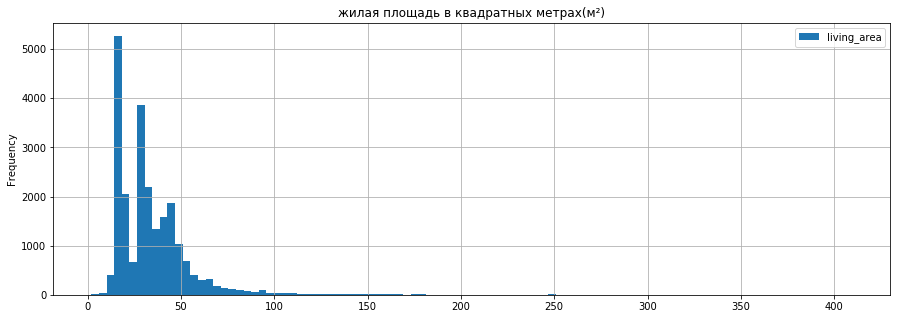

Медиана столбца цена на момент снятия с публикации равна: 4650000.00
Средние значение столбца цена на момент снятия с публикации равна: 6484663.26


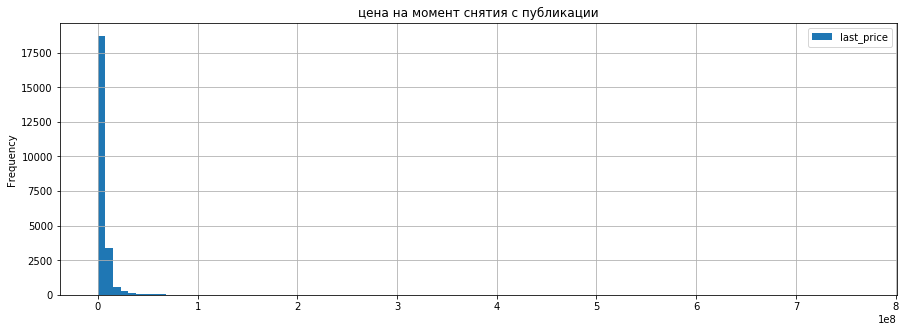

Медиана столбца число комнат равна: 2.00
Средние значение столбца число комнат равна: 2.08


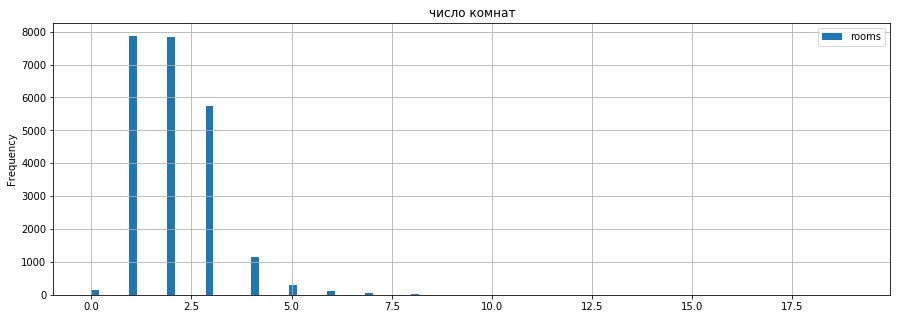

Медиана столбца высота потолков (м) равна: 2.64
Средние значение столбца высота потолков (м) равна: 2.71


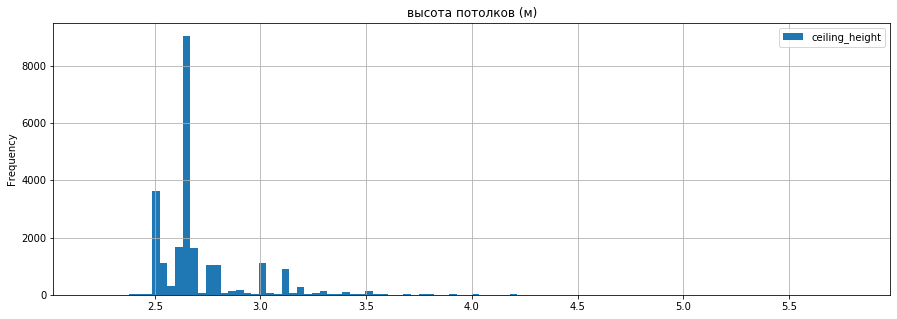

Медиана столбца соотношение жилой и общей площади равна: 0.57
Средние значение столбца соотношение жилой и общей площади равна: 0.56


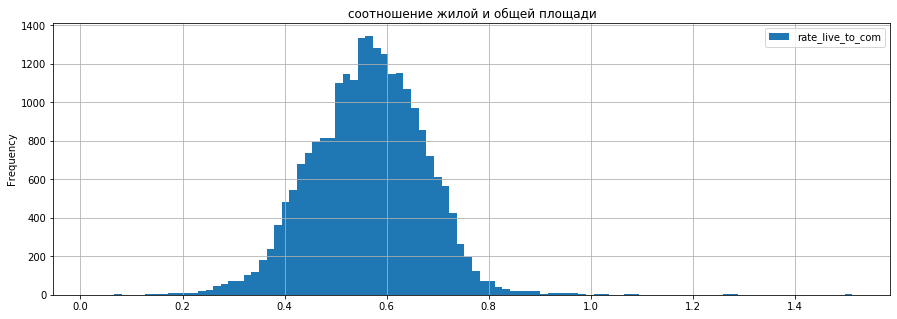

Медиана столбца отношение площади кухни к общей равна: 0.17
Средние значение столбца отношение площади кухни к общей равна: 0.19


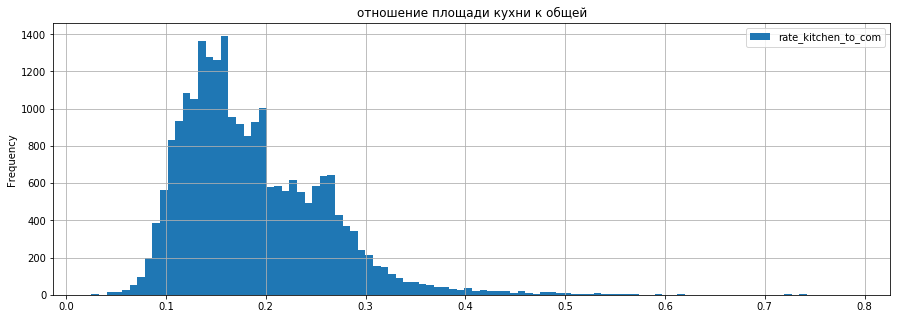

Медиана столбца расстояние до ближайшего аэропорта в метрах (м) равна: 124.00
Средние значение столбца расстояние до ближайшего аэропорта в метрах (м) равна: 233.34


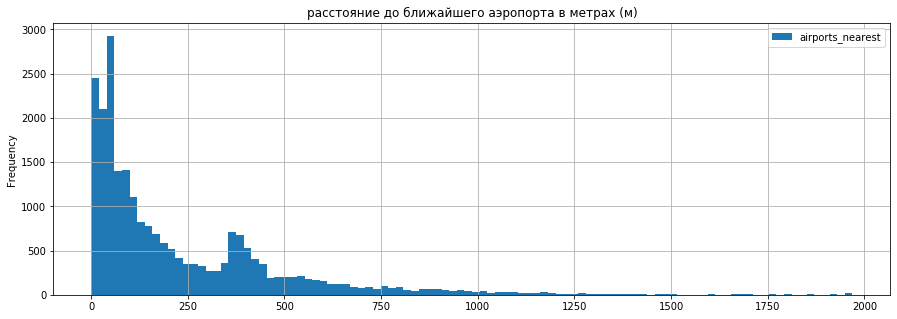

In [72]:
#Изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
#Постройте гистограммы для каждого параметра.
what_study=['total_area', 'living_area', 'last_price','rooms', 
            'ceiling_height', 'rate_live_to_com', 'rate_kitchen_to_com', 'airports_nearest']
what_study_name=['площадь квартиры в квадратных метрах (м²)',
                'жилая площадь в квадратных метрах(м²)',
                'цена на момент снятия с публикации',
                'число комнат',
                'высота потолков (м)',
                'соотношение жилой и общей площади',
                'отношение площади кухни к общей',
                'расстояние до ближайшего аэропорта в метрах (м)']

for i in range(len(what_study)):
    data.plot(y=[what_study[i]],kind='hist',
              bins=100, 
              figsize=(15,5), 
              grid=True, title=what_study_name[i])
    median=data[what_study[i]].median()
    mean=data[what_study[i]].mean()
    print("Медиана столбца {} равна: {:.2f}".format(what_study_name[i],median))
    print("Средние значение столбца {} равна: {:.2f}".format(what_study_name[i],mean))
    plt.show()

<font color=green>Классная автоматизация.

Вывод: все графики напоминают собой распределение распределение Пуассона с очень длинными хвостами. Необходимо отфильтровать данные и устаринить

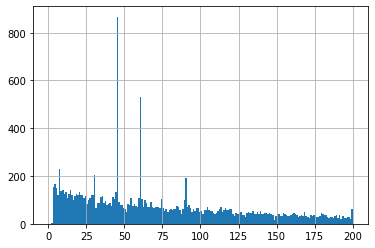

Среднее время продажи квартиры: 181 дн.
Медианное время продажи квартиры: 96 дн.


In [73]:
#Изучите время продажи квартиры. 
#Постройте гистограмму. Посчитайте среднее и медиану. 
#Опишите, сколько обычно занимает продажа. 
#Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
closed_ad=data[~data['Open']]
closed_ad['days_exposition'].hist(bins=200, range=(0,200))
plt.show()
print('Среднее время продажи квартиры: {:.0f} дн.'.format(closed_ad['days_exposition'].mean()))
print('Медианное время продажи квартиры: {:.0f} дн.'.format(closed_ad['days_exposition'].median()))

In [74]:
closed_ad['days_exposition'].value_counts().sort_values(ascending=False).head(20)

45    867
60    529
7     231
30    206
90    191
4     168
3     152
5     150
14    143
9     140
8     138
20    135
44    135
11    134
10    125
18    125
13    124
6     122
21    122
28    122
Name: days_exposition, dtype: int64

<font color='blue'>Давай посмотрим эту гистограмму на масштабе до 200 дней на 100 корзин. Видим ли мы что-то необычное?

<div style="border:solid red; padding: 10px">
<font color='green'>
Да, есть необычные выбросы, однако становится понятно, что квартиры чаще продаются примерно за 2 месяца. Причём интересно, что числа какие-то слишком красивые (45, 60, 30)
</div> 

<b>UPD: <font color='blue'>На 45й и 60й день, в зависимости от типа объявления, на сервисе происходит автоматическая деактивация объявлений.

In [75]:
closed_ad['days_exposition'].quantile(q=0.85)

364.0

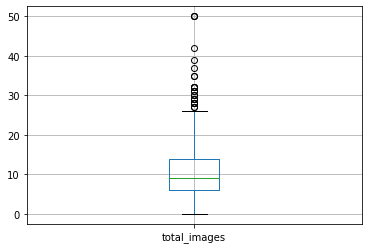

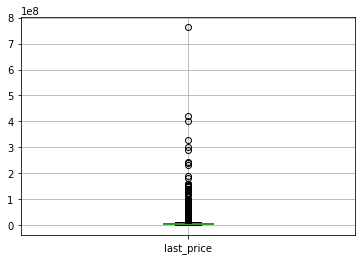

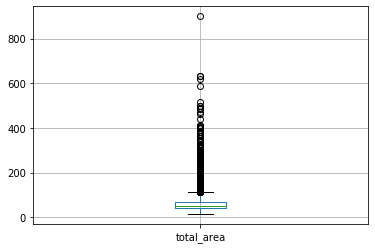

Столбец first_day_exposition не подходит для построения диграммы размаха


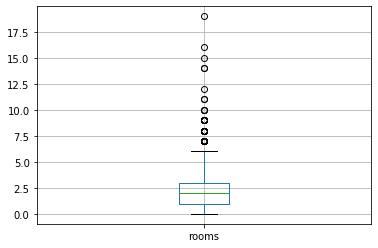

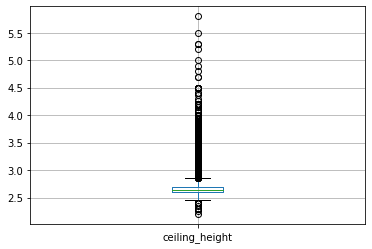

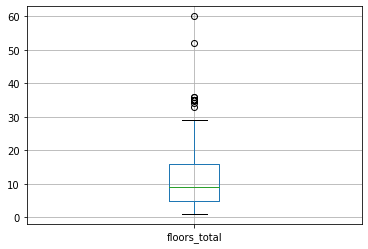

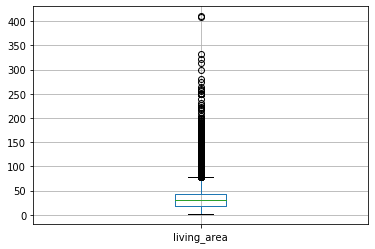

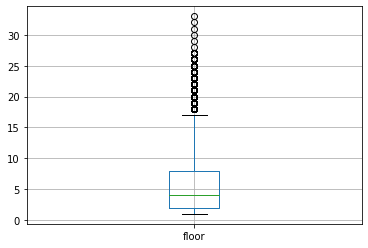

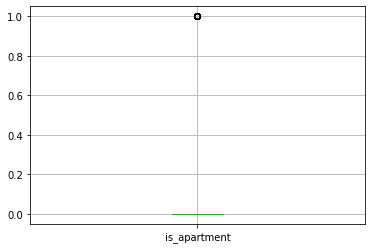

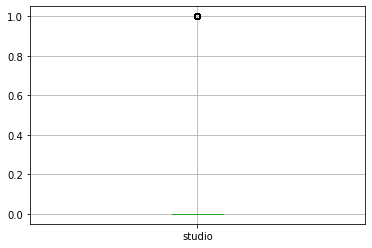

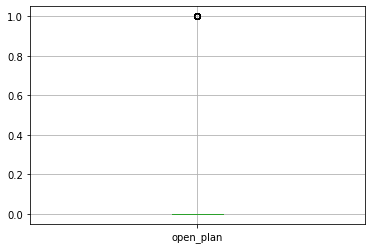

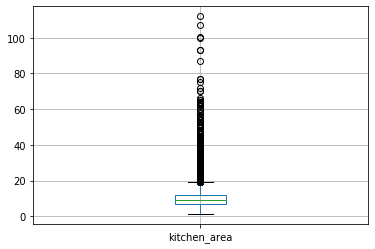

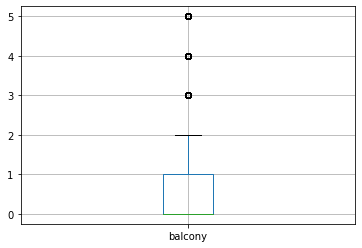

Столбец locality_name не подходит для построения диграммы размаха


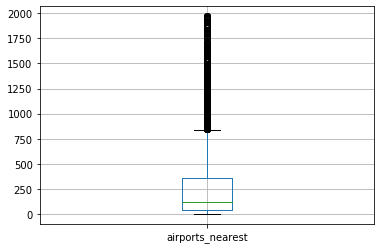

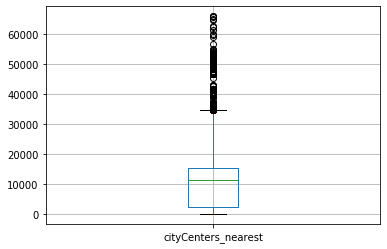

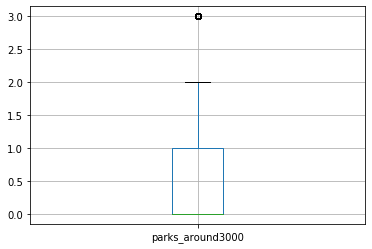

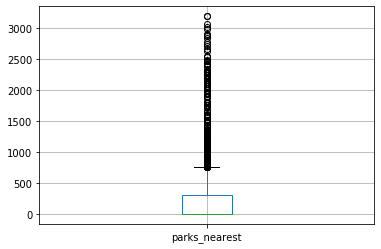

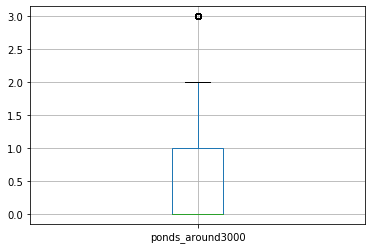

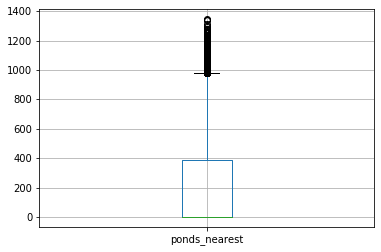

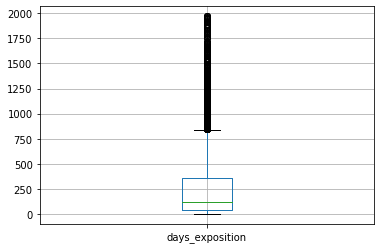

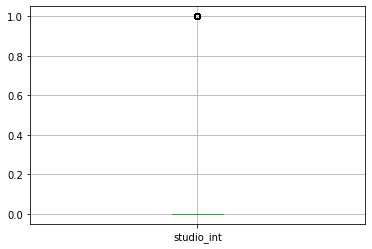

Столбец locality_name_type не подходит для построения диграммы размаха


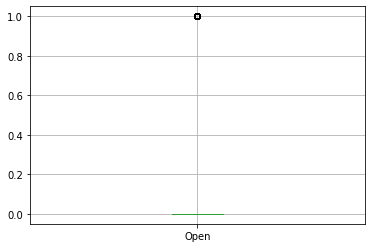

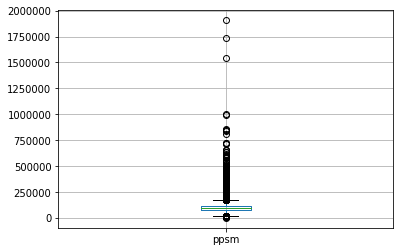

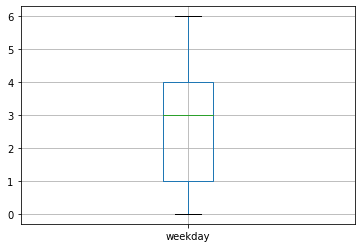

Столбец weekday_name не подходит для построения диграммы размаха


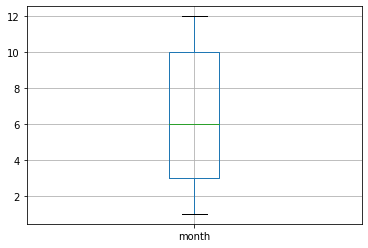

Столбец month_name не подходит для построения диграммы размаха


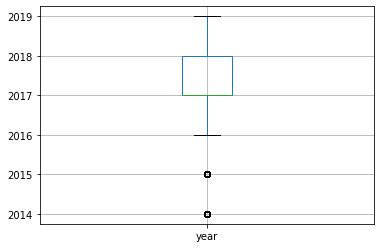

Столбец floor_type не подходит для построения диграммы размаха


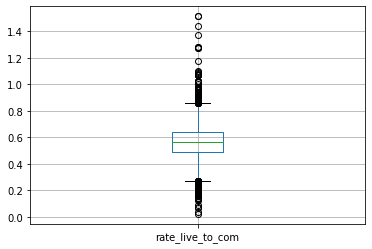

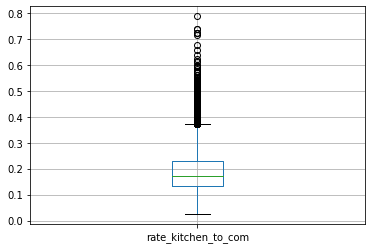

In [76]:
#Бедем рассматривать все данные, даже те, которые ещё не закрыты
for column in data.columns:
    try:
        data.boxplot(column)
        plt.show()
    except:
        print("Столбец {} не подходит для построения диграммы размаха".format(column))
#closed_ad.boxplot(['days_exposition'])

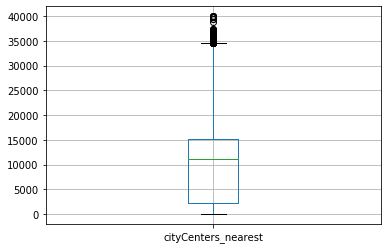

In [77]:
#Всё ещё много
#data[data['last_price']<100_000_000].boxplot('last_price')
#data[data['ceiling_height']<3].boxplot('ceiling_height')
#data[data['last_price']<10_000_000].boxplot('kitchen_area')
#data[data['kitchen_area']<20].boxplot('kitchen_area')
data[data['cityCenters_nearest']<40_000].boxplot('cityCenters_nearest')

Вывод: на неотфильтрованных данных среднее время продаж составляет почти 6 месяцев. Исходи из гистограммы видно, что ориентироваться при оценки ожидаемого времени продаж квартиры на среднее время будет неправильным, так как слишком большие значения (больше 300 - продавать квартиру почти год или больше - как-то подозрительно) смещают среднюю величину времени в область высоких значений. Если ориентироваться на медиану, то она составляет число, которое почти в 2 раза меньшее медианы и с логической точки зрения более ожидаемо, всё таки не портативную колонку продаём. 
Предположу, что слишком явными выбросами являются значения выше 500 дней и ниже 45 дней (из describe).
    Для определения граничных значений, выше и ниже которых находятся аномальные значения воспользуемся диаграммной размаха

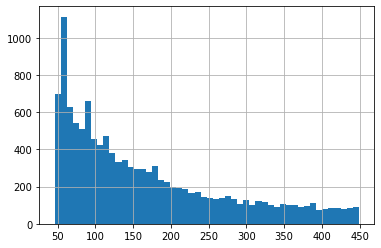

In [78]:
#Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
normalized_closed_ad=closed_ad[(closed_ad['days_exposition']<450) &(closed_ad['days_exposition']>45)]
normalized_closed_ad['days_exposition'].hist(bins=50)
plt.show()

In [79]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'studio_int', 'locality_name_type',
       'Open', 'ppsm', 'weekday', 'weekday_name', 'month', 'month_name',
       'year', 'floor_type', 'rate_live_to_com', 'rate_kitchen_to_com'],
      dtype='object')

Вывод (все сделаны на основании диаграмм размаха):
- total_images - в данном столбце аномалий нет, хотя количество фотографий объекта продажи меньше 7 и больше 15 выходят за пределы типичных значений, а большие 25 фотографий наблюдается только у исключительных объектов
- last_price - квартиры выше 10 млн рублей смещают данные и их, возможно стоит рассмотреть отдельно, наиболее типичными являются цены от 3 до 6 млн
- total_area - большинство квартир, стоимостью более 10 млн имеют огромный размер помещения >200 метров, хотя типичным метражом для квартир является от 40 до 60, квартиры от 60 до 100 метров также подходят для анализа данных, и их доля составляет 25%
- rooms - типичная ситуация для количество комнат - это 1-3 комнаты, студии также входят в аналитическую группы, но их количество составляет 25%, количество квартир больше 7 также следует выбросить из анализа продаж типичных квартир
- ceiling_height - высоту потолков оставим без изменений, так как остальные выбросы, связанные с дорогими доамами с высокими потолками обростяся на предыдщуих стадиях анализа
- не думаю что булевые значения можно анализировать на выбросы, поэтому следующие 3 столбца пропустим
- kitchen_area - оставим объекты с размером квартир от 2 до 17
- balcony - количество балконов до 2
- airports_nearest - создаётся впечатление, что все живут около аэропорта  (странный столбец, сделаем вид что его нет)
- cityCenters_nearest - как правило люди не продают квартиры прямо в центре или за пределами города (типичные квартиры расположены в кольце от 5 до 15 км). Объекты, которые расположены дальше 40 км выбросим из анализа
- parks_nearest и parks_around3000 - в большинстве объявлений указано, что на расстояния 750 м есть 1 парк, или их вообще нет. записи, в которых больше 1 парка выбросим из расчётов
- ponds_around3000 и ponds_nearest - ситуация аналогична паркам, только ближайшее расстояние до пруда 400 метров (наверное где-то на озерках продают)
- параметр ppsm - цена квадратного метра - впишется сам в размах, когда мы выровняем взаимосвязанные параметры
- как правило объявления о продаже подавались в 2017 и в 2018 годах с помедельника по четверг в любое время годе, кроме декабря и января (новый год как никак)

<font color='green'>Очень тщательный анализ выбросов.

In [80]:
print("Было:", data.shape[0])

Было: 23252


In [81]:
#Большущий фильтр
data_for_parse=data.query("last_price<100_000_000 and total_area<100 and rooms<7 and 2<kitchen_area<40 and balcony<3 and airports_nearest<40_000")
data_for_parse

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,Open,ppsm,weekday,weekday_name,month,month_name,year,floor_type,rate_live_to_com,rate_kitchen_to_com
1,7,3350000.0,40.40,2018-12-04,1,2.64,11,18.6,1,False,...,False,82920.792079,1,вторник,12,Декабрь,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.64,5,34.3,4,False,...,False,92785.714286,3,четверг,8,Август,2015,Другой,0.612500,0.148214
5,10,2890000.0,30.40,2018-09-10,1,2.64,12,14.4,5,False,...,False,95065.789474,0,понедельник,9,Сентябрь,2018,Другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.64,26,10.6,6,False,...,False,99195.710456,3,четверг,11,Ноябрь,2017,Другой,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,2.64,24,30.5,22,False,...,True,110544.692737,3,четверг,4,Апрель,2019,Другой,0.425978,0.263966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,False,73717.948718,4,пятница,8,Август,2016,Другой,0.641026,0.128205
23695,14,3100000.0,59.00,2018-01-15,3,2.64,5,38.0,4,False,...,False,52542.372881,0,понедельник,1,Январь,2018,Другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,2.64,3,29.7,1,False,...,True,44091.710758,6,воскресенье,2,Февраль,2018,Первый,0.523810,0.141093
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,False,...,False,149511.400651,1,вторник,3,Март,2017,Другой,0.397394,0.303583


In [82]:
print("Стало:", data_for_parse.shape[0])
print("Проценты от исходных: {:.0%}".format(data_for_parse.shape[0]/data.shape[0]))

Стало: 20938
Проценты от исходных: 90%


<s><font color=red> Вжух и потеряли 80% данных. Вообще, у тебя ошибка в запросе, найди сам. Но даже с учетом этого отрезаем довольно много. Постарайся сохранить как минимум 80% данных.

<b>UPD: <font color='green'>Вот теперь и экстремальные данные порезали, и достаточно для анализа осталось.

In [83]:
#data['weekday'].value_counts()

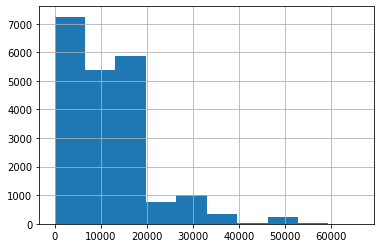

In [84]:
data_for_parse['cityCenters_nearest'].hist()

In [85]:
#Какие факторы больше всего влияют на стоимость квартиры?
#Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. 
#Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
#Также изучите зависимость от даты размещения: дня недели, месяца и года.
data_for_parse.corr().sort_values(by='last_price')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_nearest,days_exposition,studio_int,Open,ppsm,weekday,month,year,rate_live_to_com,rate_kitchen_to_com
rate_kitchen_to_com,-0.026109,-0.073997,-0.412378,-0.638646,0.058662,0.365926,-0.623939,0.260170,0.012293,0.023211,...,0.000953,-0.048550,0.023211,-0.054838,0.242313,-0.003211,0.011448,0.007080,-0.668378,1.000000
studio_int,-0.023265,-0.042995,-0.097571,-0.157170,0.018949,0.063934,-0.059515,0.032848,-0.002791,1.000000,...,-0.002139,-0.003686,1.000000,0.001879,0.033241,0.004560,-0.000132,0.002488,0.074621,0.023211
studio,-0.023265,-0.042995,-0.097571,-0.157170,0.018949,0.063934,-0.059515,0.032848,-0.002791,1.000000,...,-0.002139,-0.003686,1.000000,0.001879,0.033241,0.004560,-0.000132,0.002488,0.074621,0.023211
rate_live_to_com,0.005700,-0.032416,0.217058,0.580463,-0.054572,-0.382206,0.624259,-0.274573,-0.007251,0.074621,...,-0.018356,0.018602,0.074621,0.044448,-0.226446,0.007128,-0.015875,0.008616,1.000000,-0.668378
open_plan,-0.019991,-0.030864,-0.058773,-0.086965,-0.001463,0.043865,-0.034320,0.031918,-0.001856,-0.003383,...,-0.003101,-0.021410,-0.003383,-0.017797,0.008810,0.005079,0.019516,-0.023996,0.050292,0.014110
weekday,-0.007896,-0.016947,-0.009074,0.000228,-0.009743,0.007020,-0.004017,0.007477,-0.012541,0.004560,...,-0.007584,-0.024821,0.004560,-0.018780,-0.016399,1.000000,0.008976,0.001920,0.007128,-0.003211
month,0.004103,-0.002307,0.005775,-0.000741,0.002127,0.016143,-0.002840,0.022585,-0.002306,-0.000132,...,0.003628,-0.061689,-0.000132,-0.144120,-0.006807,0.008976,1.000000,-0.270212,-0.015875,0.011448
year,0.148760,0.006044,-0.049358,-0.024379,-0.047473,-0.000007,-0.036432,0.002744,0.006651,0.002488,...,-0.010169,-0.339558,0.002488,0.384542,0.055738,0.001920,-0.270212,1.000000,0.008616,0.007080
balcony,0.031856,0.007507,-0.014759,-0.066922,-0.070238,0.181588,-0.053988,0.179116,0.026595,0.040252,...,-0.016039,-0.039663,0.040252,-0.017472,0.033048,0.000597,0.013839,-0.014426,-0.098838,0.081368
cityCenters_nearest,0.004784,0.045831,-0.029215,-0.016811,-0.141126,0.090105,-0.030069,0.059477,0.016056,-0.013761,...,0.216708,-0.042959,-0.013761,-0.038132,0.126757,0.000156,-0.009599,-0.009071,-0.017943,-0.019781


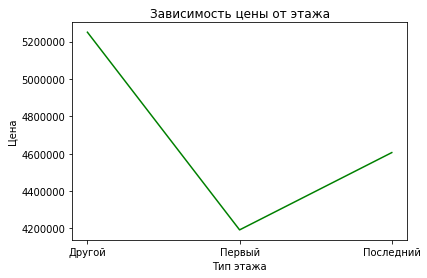

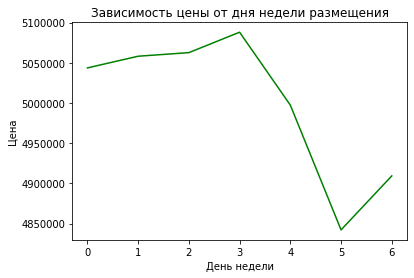

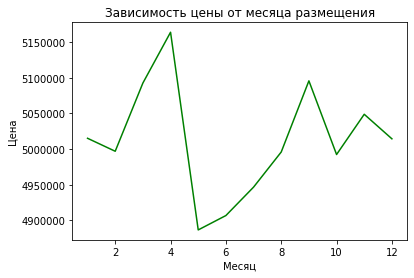

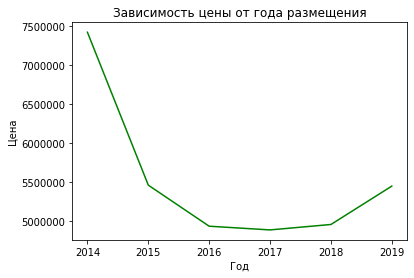

In [86]:
pivot_by_floor=data_for_parse.pivot_table(index='floor_type', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_floor.index,pivot_by_floor["mean"]["last_price"], 'g-')
plt.title('Зависимость цены от этажа')
plt.ylabel('Цена')
plt.xlabel('Тип этажа')
plt.show()

pivot_by_day=data_for_parse.pivot_table(index='weekday', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_day.index,pivot_by_day["mean"]["last_price"], 'g-')
plt.title('Зависимость цены от дня недели размещения')
plt.ylabel('Цена')
plt.xlabel('День недели')
plt.show()

pivot_by_month_name=data_for_parse.pivot_table(index='month', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_month_name.index,pivot_by_month_name["mean"]["last_price"], 'g')
plt.title('Зависимость цены от месяца размещения')
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.show()

pivot_by_year=data_for_parse.pivot_table(index='year', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_year.index,pivot_by_year["mean"]["last_price"], 'g-')
plt.title('Зависимость цены от года размещения')
plt.ylabel('Цена')
plt.xlabel('Год')
plt.show()
#pivot_by_year["mean"]["last_price"]

<s><font color=brown> Здесь очень напрашиваются графики.

Вывод:
- исходя из корреляционной матрицы на стоимость квартиры влияют: общая площадь квартиры (0.52), и как следствие количество комнат (0.42) и жилая площадь (0.46), стоит отметить, что связь с площадью кухни не такая сильная, всего (0.19). Наличие между общим метражом и ценой квартиры также показывает коэффициет стоимость квадратного метра (0.68). Цена квартиры имеет сильную отрицательную корреляцию с коэффициентом, демонстрирующем отношение площади ккухни к ко всей площади, и это понятно, что чем больше этот коэффициент, тем меньше общая площщадь квартиры
- Таким образом цена сильно зависит от количества квадратных метров. Число комнат в меньшей степени влияет на цену квартиры, однако корреляция всё ещё наблюдается, а вот удалённость от центра совсем не влияет на цену квартиры (записи квартир, расположенных прямо в центре также остались в анализируемом наборе)
- цена квартиры на первом этаже как правило ниже, чем на других
- цены на квартиры под дейтсвием инфляции растут каждый год (в 2014 был валютный кризис, поэтому начальный подъём такой высокий, а затем идёт спад)
- цены на квартиры зимой выше чем летом (замануха со скидками и ипотека как подарок Санты под ёлкой?)
- люди выставляют завышенные цены на квартиры во вторник и ближе к выходным они падают (если будешь искать съёмное жильё, ищи объявления, установлленые в субботу с утра)

<font color=green>В целом, с корреляцией и датами у нас все отлично. 

In [87]:
#Выберите 10 населённых пунктов с наибольшим числом объявлений. 
#Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
#Выделите населённые пункты с самой высокой и низкой стоимостью жилья.
largest_group=data_for_parse.groupby('locality_name').count().sort_values('total_images', ascending=False)[:10].index

mean_price=[]
for name in largest_group:
    largest_group_parse=data[data['locality_name']==name]
    mean_data=largest_group_parse['ppsm'].mean()
    print("В населённом пункте '{}' средняя цена квадратного метра: {:.2f} руб".format(name, mean_data))
    mean_price.append(mean_data)

В населённом пункте 'Санкт-Петербург' средняя цена квадратного метра: 114442.95 руб
В населённом пункте 'посёлок Мурино' средняя цена квадратного метра: 85207.23 руб
В населённом пункте 'посёлок Шушары' средняя цена квадратного метра: 78551.34 руб
В населённом пункте 'Всеволожск' средняя цена квадратного метра: 68750.70 руб
В населённом пункте 'Пушкин' средняя цена квадратного метра: 102844.93 руб
В населённом пункте 'посёлок Парголово' средняя цена квадратного метра: 90332.26 руб
В населённом пункте 'Колпино' средняя цена квадратного метра: 75408.35 руб
В населённом пункте 'Гатчина' средняя цена квадратного метра: 68757.68 руб
В населённом пункте 'деревня Кудрово' средняя цена квадратного метра: 92419.63 руб
В населённом пункте 'Выборг' средняя цена квадратного метра: 58238.14 руб


In [88]:
print("Город с максимальной стоимостью жилья: {}".format(largest_group[mean_price.index(max(mean_price))]))
print("Город с минимальной стоимостью жилья: {}".format(largest_group[mean_price.index(min(mean_price))]))

Город с максимальной стоимостью жилья: Санкт-Петербург
Город с минимальной стоимостью жилья: Выборг


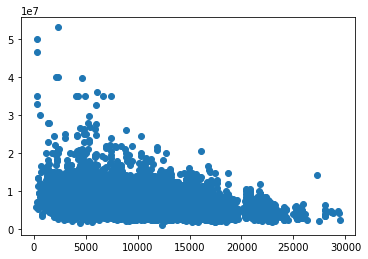

In [89]:
data_SPB=data_for_parse[data_for_parse['locality_name']=='Санкт-Петербург']
plt.scatter(x=data_SPB['cityCenters_nearest'], y=data_SPB['last_price'])

In [90]:
#Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
#Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
#Сделайте выводы. Отличаются ли они от общих выводов по всему городу?
cetral_objects=data_for_parse[data['cityCenters_nearest']<7500]
cetral_objects.corr().sort_values(by='last_price')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_nearest,days_exposition,studio_int,Open,ppsm,weekday,month,year,rate_live_to_com,rate_kitchen_to_com
rate_live_to_com,0.008378,-0.055178,0.197040,0.532495,0.013188,-0.338444,0.611149,-0.254342,0.025557,0.071512,...,-0.027517,0.027249,0.071512,0.049167,-0.190837,0.007572,-0.007258,0.006765,1.000000,-0.630658
year,0.136638,-0.054503,-0.076819,-0.043670,-0.047670,-0.013272,-0.059482,-0.003419,-0.020646,-0.003139,...,-0.066339,-0.351637,-0.003139,0.382947,-0.024747,0.003889,-0.253145,1.000000,0.006765,0.009879
balcony,0.006041,-0.050115,-0.068756,-0.106836,-0.147758,0.207780,-0.104090,0.199408,0.023905,0.036862,...,-0.096443,-0.017858,0.036862,-0.008507,-0.018464,0.014344,0.000096,-0.005288,-0.115733,0.095892
studio_int,-0.042454,-0.029921,-0.100218,-0.173279,0.013381,0.072973,-0.060520,0.059431,-0.002964,1.000000,...,0.009373,-0.007177,1.000000,0.002037,0.027219,-0.000835,-0.012045,-0.003139,0.071512,0.019575
studio,-0.042454,-0.029921,-0.100218,-0.173279,0.013381,0.072973,-0.060520,0.059431,-0.002964,1.000000,...,0.009373,-0.007177,1.000000,0.002037,0.027219,-0.000835,-0.012045,-0.003139,0.071512,0.019575
rate_kitchen_to_com,-0.016395,-0.027838,-0.411387,-0.607180,-0.000411,0.374104,-0.611018,0.261367,-0.001562,0.019575,...,-0.003137,-0.071901,0.019575,-0.074231,0.201942,0.002476,0.009667,0.009879,-0.630658,1.000000
open_plan,-0.031246,-0.024821,-0.068877,-0.099347,-0.010939,0.057725,-0.041739,0.036292,-0.002162,-0.004382,...,-0.014651,-0.030858,-0.004382,-0.023399,0.011764,0.012178,0.037581,-0.036542,0.049540,0.013295
weekday,-0.007266,-0.020852,-0.012312,0.005765,-0.007462,-0.001572,-0.008051,0.013881,-0.018198,-0.000835,...,-0.017027,-0.022084,-0.000835,-0.016738,-0.022428,1.000000,0.026313,0.003889,0.007572,0.002476
month,0.000352,0.001314,0.013631,0.002330,0.005857,0.032852,0.007032,0.035281,-0.003503,-0.012045,...,0.017628,-0.068743,-0.012045,-0.135161,-0.000628,0.026313,1.000000,-0.253145,-0.007258,0.009667
floor,0.000124,0.035583,-0.095312,-0.198758,-0.093048,0.709261,-0.185463,1.000000,-0.007397,0.059431,...,-0.061014,-0.076041,0.059431,-0.079968,0.125407,0.013881,0.035281,-0.003419,-0.254342,0.261367


In [91]:
cetral_objects

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,Open,ppsm,weekday,weekday_name,month,month_name,year,floor_type,rate_live_to_com,rate_kitchen_to_com
5,10,2890000.0,30.40,2018-09-10,1,2.64,12,14.40,5,False,...,False,95065.789474,0,понедельник,9,Сентябрь,2018,Другой,0.473684,0.299342
8,20,2900000.0,33.16,2018-05-23,1,2.64,27,15.43,26,False,...,False,87454.764777,2,среда,5,Май,2018,Другой,0.465320,0.265682
12,10,3890000.0,54.00,2016-06-30,2,2.64,5,30.00,5,False,...,False,72037.037037,3,четверг,6,Июнь,2016,Последний,0.555556,0.166667
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,False,...,False,86206.896552,0,понедельник,4,Апрель,2017,Другой,0.517241,0.189655
24,8,6500000.0,97.20,2015-10-31,2,3.10,3,46.50,1,False,...,False,66872.427984,5,суббота,10,Октябрь,2015,Первый,0.478395,0.201646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,False,129903.978052,3,четверг,10,Октябрь,2016,Другой,0.552812,0.145405
23692,2,1350000.0,30.00,2017-07-07,1,2.64,5,17.50,4,False,...,False,45000.000000,4,пятница,7,Июль,2017,Другой,0.583333,0.200000
23695,14,3100000.0,59.00,2018-01-15,3,2.64,5,38.00,4,False,...,False,52542.372881,0,понедельник,1,Январь,2018,Другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,2.64,3,29.70,1,False,...,True,44091.710758,6,воскресенье,2,Февраль,2018,Первый,0.523810,0.141093


<div style="border:solid red; padding: 10px">
<font color='green'>
Судля по тому, что высокие значения цены заканчиваются на 7,5 км, то это и нужно считать центром
</div> 

<font color=brown> Давай построим график средних цен в зависимости от расстояния. Так мы проверим по ценам, где проходит граница центра. И не забудем, что речь идет сугубо о Питере.

<b>UPD: <font color='blue'>Я имел в виду добавить в таблицу расстояние в километрах и по сводной построить график, как ты делаешь выше. Тогда мы бы довольно четко увидели границу.

Медиана столбца площадь квартиры в квадратных метрах (м²) равна: 51.20
Средние значение столбца площадь квартиры в квадратных метрах (м²) равна: 54.06


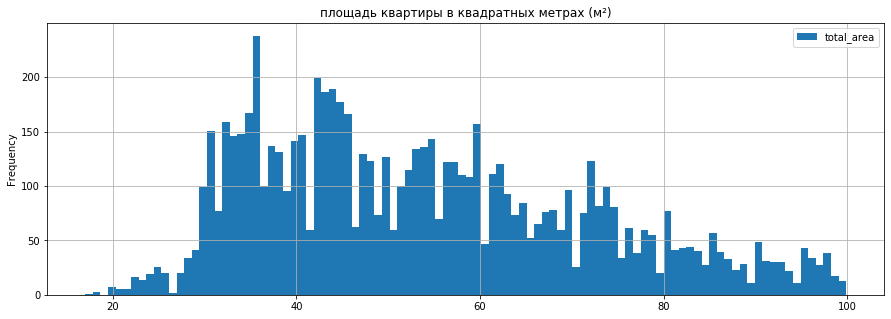

Медиана столбца жилая площадь в квадратных метрах(м²) равна: 30.00
Средние значение столбца жилая площадь в квадратных метрах(м²) равна: 31.05


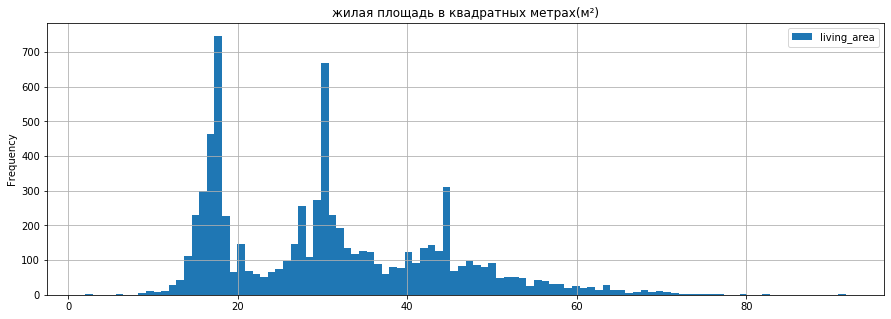

Медиана столбца цена на момент снятия с публикации равна: 3500000.00
Средние значение столбца цена на момент снятия с публикации равна: 4689336.67


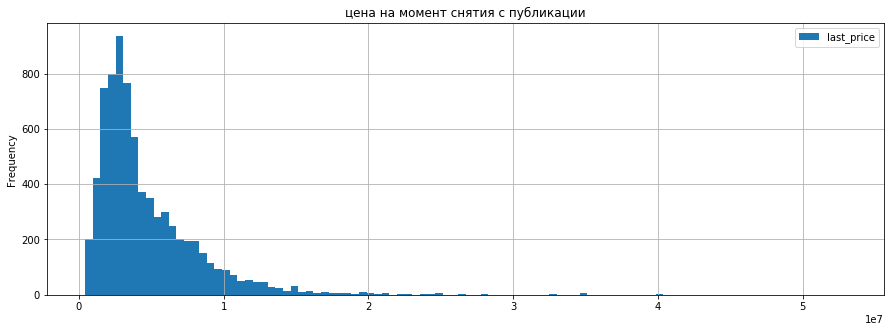

Медиана столбца число комнат равна: 2.00
Средние значение столбца число комнат равна: 1.95


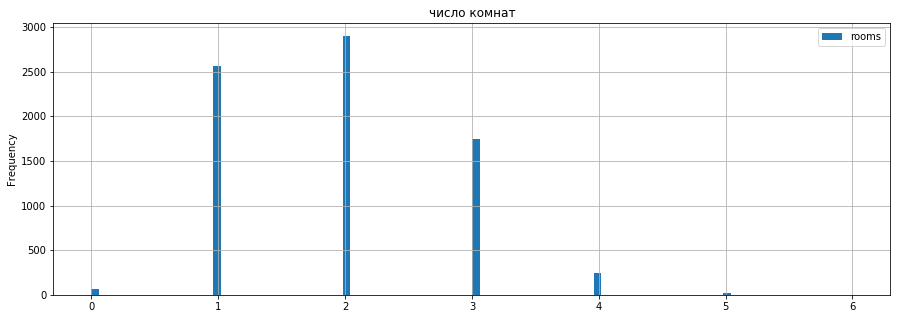

Медиана столбца высота потолков (м) равна: 2.64
Средние значение столбца высота потолков (м) равна: 2.74


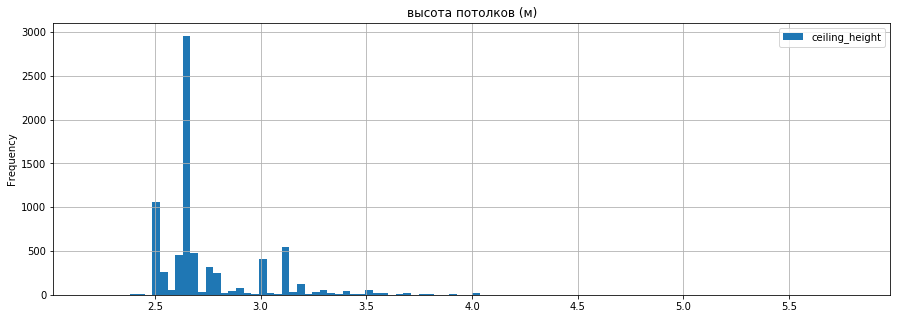

Медиана столбца соотношение жилой и общей площади равна: 0.57
Средние значение столбца соотношение жилой и общей площади равна: 0.57


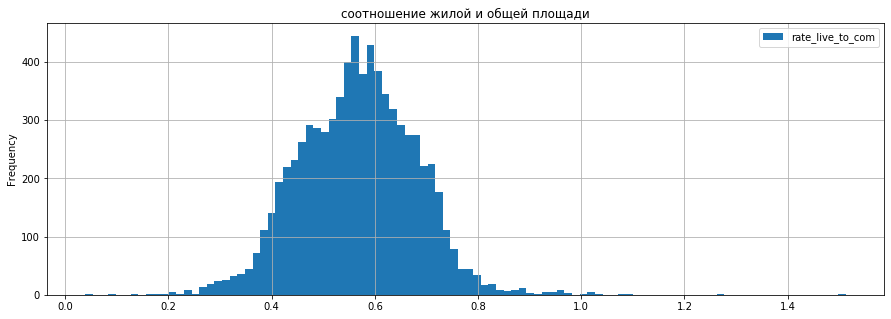

Медиана столбца отношение площади кухни к общей равна: 0.17
Средние значение столбца отношение площади кухни к общей равна: 0.19


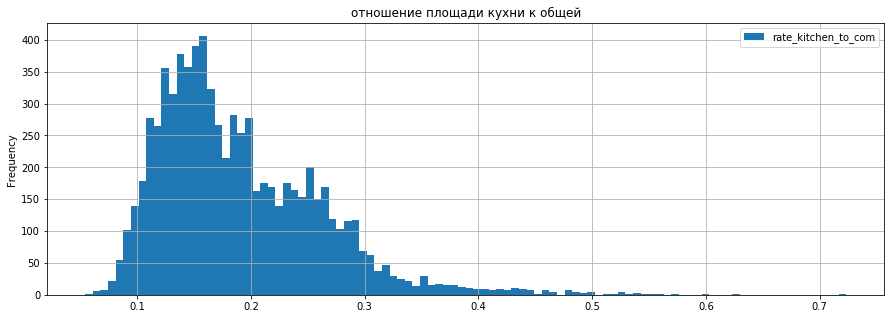

In [92]:
what_study=['total_area', 'living_area', 'last_price','rooms', 
            'ceiling_height', 'rate_live_to_com', 'rate_kitchen_to_com']
what_study_name=['площадь квартиры в квадратных метрах (м²)',
                'жилая площадь в квадратных метрах(м²)',
                'цена на момент снятия с публикации',
                'число комнат',
                'высота потолков (м)',
                'соотношение жилой и общей площади',
                'отношение площади кухни к общей',
                ]

for i in range(len(what_study)):
    cetral_objects.plot(y=[what_study[i]],kind='hist',
              bins=100, 
              figsize=(15,5), 
              grid=True, title=what_study_name[i])
    median=cetral_objects[what_study[i]].median()
    mean=cetral_objects[what_study[i]].mean()
    print("Медиана столбца {} равна: {:.2f}".format(what_study_name[i],median))
    print("Средние значение столбца {} равна: {:.2f}".format(what_study_name[i],mean))
    plt.show()

Медиана столбца площадь квартиры в квадратных метрах (м²) равна: 49.00
Средние значение столбца площадь квартиры в квадратных метрах (м²) равна: 52.57


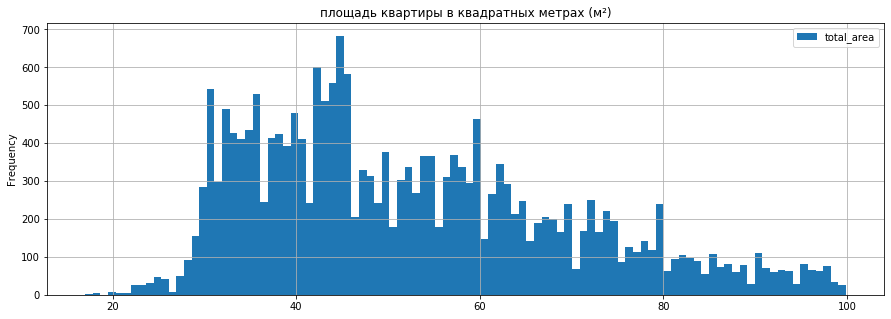

Медиана столбца жилая площадь в квадратных метрах(м²) равна: 29.40
Средние значение столбца жилая площадь в квадратных метрах(м²) равна: 29.97


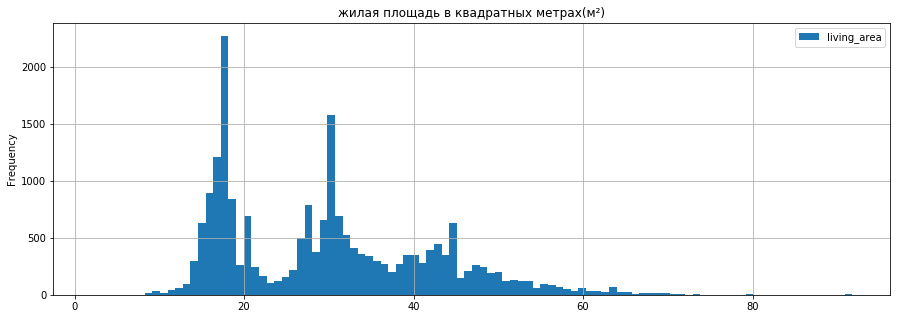

Медиана столбца цена на момент снятия с публикации равна: 4400000.00
Средние значение столбца цена на момент снятия с публикации равна: 5023098.49


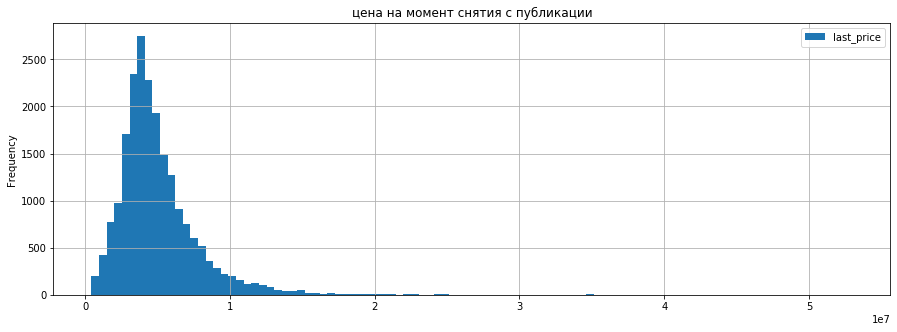

Медиана столбца число комнат равна: 2.00
Средние значение столбца число комнат равна: 1.90


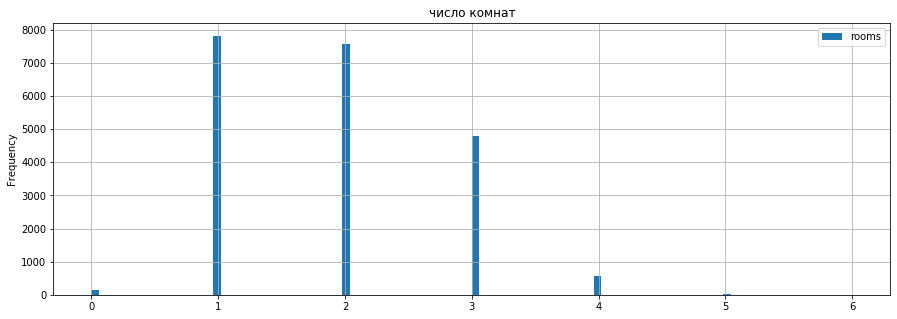

Медиана столбца высота потолков (м) равна: 2.64
Средние значение столбца высота потолков (м) равна: 2.68


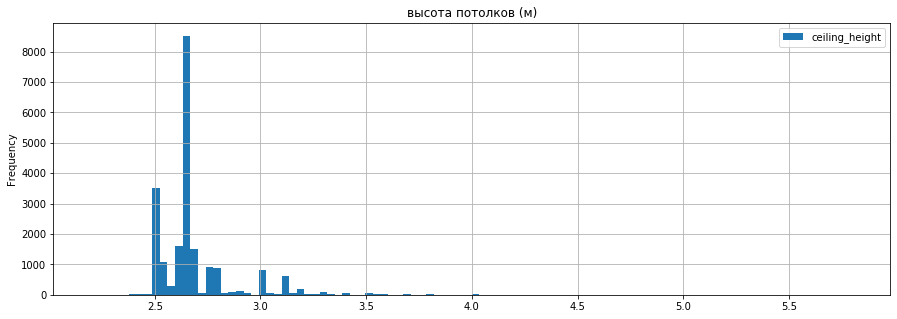

Медиана столбца соотношение жилой и общей площади равна: 0.56
Средние значение столбца соотношение жилой и общей площади равна: 0.56


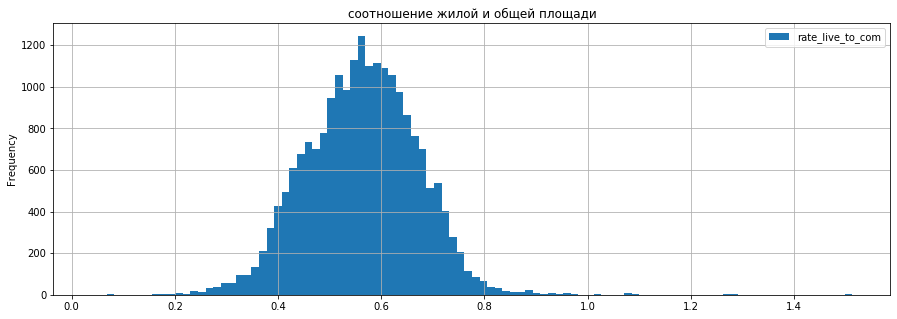

Медиана столбца отношение площади кухни к общей равна: 0.18
Средние значение столбца отношение площади кухни к общей равна: 0.19


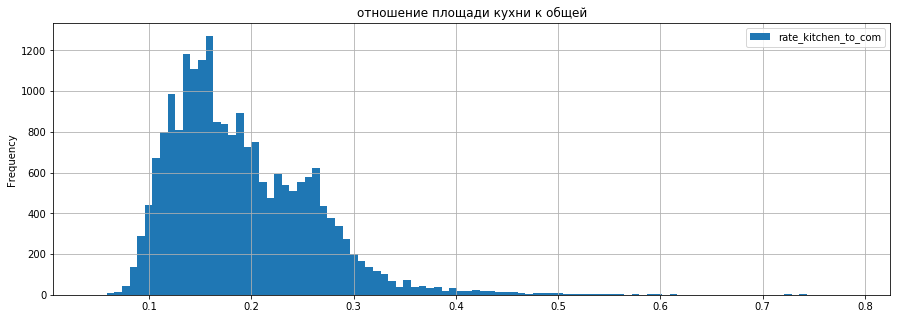

IndexError: list index out of range

In [93]:
#Изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
#Постройте гистограммы для каждого параметра.
what_study=['total_area', 'living_area', 'last_price','rooms', 
            'ceiling_height', 'rate_live_to_com', 'rate_kitchen_to_com', 'airports_nearest']
what_study_name=['площадь квартиры в квадратных метрах (м²)',
                'жилая площадь в квадратных метрах(м²)',
                'цена на момент снятия с публикации',
                'число комнат',
                'высота потолков (м)',
                'соотношение жилой и общей площади',
                'отношение площади кухни к общей']

for i in range(len(what_study)):
    data_for_parse.plot(y=[what_study[i]],kind='hist',
              bins=100, 
              figsize=(15,5), 
              grid=True, title=what_study_name[i])
    median=data_for_parse[what_study[i]].median()
    mean=data_for_parse[what_study[i]].mean()
    print("Медиана столбца {} равна: {:.2f}".format(what_study_name[i],median))
    print("Средние значение столбца {} равна: {:.2f}".format(what_study_name[i],mean))
    plt.show()

Вывод:
Как было показано выше, в работе к центру относятся квартиры в радиусе 7,5 км.
После фильтрации и нормировки таких квартир осталось 7534. 
На стоимость квартир в центре влияют: расстояние до центра (хотят видеть спас на крови из окна?), суммарная площадь, количество парков и прудов вокруг, высота потолков и размер кухни, количество комнат в меньшей степени. Всётаки у тех, кто ищет жильё в центре больше требований к квартире.
этаж, удалённость от центра и дата размещения объявления имеют слабую коррекляцию и как следствие имеют слабое воздействие на стоимость жилья
Площадь квартир вцентре и за ним почти одинаковая (по пиковым значениям тоже) 
Правда за квартиру в центре придётся заплатить на лимон больше (судя по медиане)
А остальные параметры одинаковы.
Высота потолков неожиданно одинаковая


<font color=blue>Вероятно, всему виной агрессивное отрезание выбросов. 

### Шаг 5. Общий вывод

Наибольшую ценность из исходных данных представляли: суммарная площадь квартиры, количество комнат, и цена. На основании именно этих критериев в дальнейшем происходит заполнение пропусков и устранение выбросов
Самыми проблематичными столбцами являются высота потолков, расстояние от центра и расстояние до аэропорта. Для заполнения пропусков по высоте потолков использовалось расстояние от центра, так как в центре расположены дома старого фонда, в которых высота потолков выше стандартных (3,1 м против 2.64)
Расстояние от центра заполнялось следующим образом. Исходя из того, что расстояние от центра равна 30 км, усреднять это растояние показалось неразумным и строки с пустотами по Санкт-Петербургу я благополучно выбросил. Для Объектов, расположенных вне предлов СПб пришлось обнулить данный столбец (ведь нет ниодной записи для аналагочиного заполнения) (вроде бы до центра СПб).
Столбец с days_exposition заполнен мной был зря, ведь при анализе я не учитывал их при оценках распределений. Кстати да, расстояние до аэропорта для городов кроме петербурга = 0, как и количество парков с прудами. Парадокс.
Гистограммы для и после фильтрации оцень похожи, есть незначительные различия, которые более подробно описаны в выводах. Для создания фильтров с отсеиванием выбросов использовались лдиаграммы размаха. Те значения, что выше максимальных значений отбрасывались, так как они смещали статистику по объектам продажи в сторону высоких значений (как, например, цена квартиры).
При анализе всех данных выбли обнаружены  следющие признаки, которые влияют на цену квартиру, а именно:  количество квадратных метров жилья, и количество комнат. Людей при покупке недвижимости как правило мало волнует наличие балкона (вещи можно и в кладовке складировать),  тип планировки, или день подачи объявления. По поводу фактора is_apartment делатьб выводы по корреляции с ценой нельзя, так как в работе пустые значения заменялись на false.
Наибольшее количество объявлений о продаже недвижимости (помимо петербурга) в посёлках Мурино и Шушары. Разници при анализе квартир в центре и не в центре Санккт-Петербурга не обнаружено (кроме цены, и требований чтобы квартира была именно в центре)

<font color='blue'>Итак, отличная работа, могу только похвалить. Ты показываешь прекрасное владение изучаемым материалом: строишь хорошие графики, понимаешь и используешь понятие корреляции. Грамотно строишь срезы и матрицу корреляции. Отдельно похвалю хорошую автоматизацию вывода графиков и прочей информации.  
    Однако у меня нашлось несколько замечаний, уверен, учесть их в работе тебе не составит труда. Буду ждать доработанный проект, успехов!  

<b>UPD <font color='blue'>Ожидаемо, ты отлично справился с доработкой, все что нужно, я увидел. Успехов в изучении статистики!

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [ ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [ ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод